In [575]:
import pandas as pd
from bs4 import BeautifulSoup
import bs4
import html5lib
import requests
import datetime as dt
import numpy as np
import re
from datetime import datetime
try:
    import urllib
except ImportError:
    from urlparse import urlparse

In [ ]:
# In this project, I worked with Jordan Mess, Julia D'zmura, & Hannah Rosen.

# Part 1 Step 1
# In the next block, I scrape the Space Weather Live data.

In [579]:
r = requests.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares")
root = BeautifulSoup(r.content)
lnks = root.find("table")
lnks = lnks.prettify()
dlist = pd.read_html(lnks)
firstlist = dlist[0]

firstlist.columns = ['rank', 'x_classification', 'date', 'region', 'start_time', 'maximum_time', 'end_time', 'movie']
print (firstlist)

    rank x_classification        date  region start_time maximum_time  \
0      1            X28.0  2003/11/04     486      19:29        19:53   
1      2            X20.0  2001/04/02    9393      21:32        21:51   
2      3            X17.2  2003/10/28     486      09:51        11:10   
3      4            X17.0  2005/09/07     808      17:17        17:40   
4      5            X14.4  2001/04/15    9415      13:19        13:50   
5      6            X10.0  2003/10/29     486      20:37        20:49   
6      7             X9.4  1997/11/06    8100      11:49        11:55   
7      8             X9.3  2017/09/06    2673      11:53        12:02   
8      9             X9.0  2006/12/05     930      10:18        10:35   
9     10             X8.3  2003/11/02     486      17:03        17:25   
10    11             X8.2  2017/09/10    2673      15:35        16:06   
11    12             X7.1  2005/01/20     720      06:36        07:01   
12    13             X6.9  2011/08/09    1263      

In [ ]:
# In the above step, is the data scraped from the space weather live site, with no 
# formatting yet. The way I got this data is by using a get request on the URL, 
# and then using BeautifulSoup to get the table content and prettify it.
# I also renamed the columns so that the dataframe is more clear.

In [580]:
# Part 1 Step 2

firstlist = firstlist.drop(columns='movie')
firstlist['start_time'] = pd.to_datetime(firstlist['date'] + ' ' + firstlist['start_time'])
firstlist['maximum_time'] = pd.to_datetime(firstlist['date'] + ' ' + firstlist['maximum_time'])
firstlist['end_time'] = pd.to_datetime(firstlist['date'] + ' ' + firstlist['end_time']) 
firstlist = firstlist.drop(columns='date')
firstlist = firstlist.replace('-', np.nan)
print (firstlist)

    rank x_classification  region          start_time        maximum_time  \
0      1            X28.0     486 2003-11-04 19:29:00 2003-11-04 19:53:00   
1      2            X20.0    9393 2001-04-02 21:32:00 2001-04-02 21:51:00   
2      3            X17.2     486 2003-10-28 09:51:00 2003-10-28 11:10:00   
3      4            X17.0     808 2005-09-07 17:17:00 2005-09-07 17:40:00   
4      5            X14.4    9415 2001-04-15 13:19:00 2001-04-15 13:50:00   
5      6            X10.0     486 2003-10-29 20:37:00 2003-10-29 20:49:00   
6      7             X9.4    8100 1997-11-06 11:49:00 1997-11-06 11:55:00   
7      8             X9.3    2673 2017-09-06 11:53:00 2017-09-06 12:02:00   
8      9             X9.0     930 2006-12-05 10:18:00 2006-12-05 10:35:00   
9     10             X8.3     486 2003-11-02 17:03:00 2003-11-02 17:25:00   
10    11             X8.2    2673 2017-09-10 15:35:00 2017-09-10 16:06:00   
11    12             X7.1     720 2005-01-20 06:36:00 2005-01-20 07:01:00   

In [ ]:
# After getting the dataframe, I needed to clean up the data.
# This process involved converting some data in the a dataframe so it can be
# further used in the code. There was some data convertion, for example combining date
# and time columns to be a datetime, so the data is more usable.
# I replaced all values encoded as - with a null value, and dropped some columns
# that I do not need.

In [ ]:
# Part 1 Step 3
#In the next block, I scrape the NASA data

In [587]:
nasa = requests.get("http://www.hcbravo.org/IntroDataSci/misc/waves_type2.html")
nasaroot = BeautifulSoup(nasa.content)
nasaroot = nasaroot.find('pre')

data = nasaroot.text[800:]
data = data.replace("\n", "")
data = data.replace("Double type II, CME-CME interaction?", "")
data = data.replace("uncertain", "")
data = data.replace("PARTIAL LASCO_DATA_GAP", "")
data = data.replace("LASCO_DATA_GAP", "")
data = data.replace("This may not be a type II.", "")
data = data.replace("CME_not_measurable_due_to_the_Snow_Storm", "")
data = data.replace("LASCO_DG", "")
data = data.replace("LASCO", "")
data = data.replace("DG", "")
data = data.replace("Possible_HALO", "")
data = data.replace("broad feature", "")
data = data.replace("Faint_CME_not_measurable", "")
data = data.replace("CME-CME interaction", "")
data = data.replace("faint", "")
data = data.replace("WAVES Data Gap. Lower f may be 500 kHz.", "")
data = data.replace("reverse drifts, interaction?, CME later in C3", "")
data = data.replace("------", "")

data = data.split("PHTX")


df = pd.DataFrame(data)

df = df[0].str.split(pat=None, expand=True)
df.columns= ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
df = df.drop(columns=['15'])

print (df)

                                                     1           2      3  \
0                                           1997/04/01       14:00  04/01   
1                                           1997/04/07       14:30  04/07   
2                                           1997/05/12       05:15  05/14   
3                                           1997/05/21       20:20  05/21   
4                                           1997/09/23       21:53  09/23   
5                                           1997/11/03       05:15  11/03   
6                                           1997/11/03       10:30  11/03   
7                                           1997/11/04       06:00  11/05   
8                                           1997/11/06       12:20  11/07   
9                                           1997/11/27       13:30  11/27   
10                                          1997/12/12       22:45  12/12   
11                                          1998/01/25       15:03  01/25   

In [ ]:
# In the above output is the NASA date that I scraped.
# As seen from the output above, the previous block scrapes the NASA data and gets it into
# a table format. This process was a little bit tougher because of the inconsistencies in
# the HTML page. There was no table tag with all of the content in it, so I had to find 
# different ways to find the correct content. And after it was found, I had to do a lot of
# clean up, which explains all of the replacing I did. Eventually, it contained the correct 
# data

In [ ]:
# Part 1 Step 4
# Tidying the NASA data

In [588]:
df.columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency','end_frequency', 'flare_location','flare_region','flare_classification', 'cme_date', 'cme_time' , 'cme_angle', 'cme_width', 'cme_speed']
df = df.replace('----', np.nan)
df = df.replace('--/--', np.nan)
df = df.replace('--:--', np.nan)
df = df.replace('-----', np.nan)
df = df.replace('---', np.nan)
df = df.replace('------', np.nan)

df = df.replace('LASCO_DG', np.nan)

df['halo'] = np.where(df['cme_angle']=='Halo', 'True', 'False')
df = df.replace('Halo', np.nan)
df['lowerbound'] = np.where(df['cme_width'].str.contains('>'), 'True', 'False')
df['cme_width'] = df.cme_width.str.replace('>', '')
df['start_date'] = df.start_date.str.replace('uncertain','')
df['start_date'] = df.start_date.str.replace('faint','')
df = df.drop([481,482])



df['start_date'] = (df['start_time'] + ' ' + df['start_date'])
df['cme_date'] = (df['cme_time'] + ' ' + df['cme_date'])
df['end_date'] = (df['end_time'] + ' ' + df['end_date']) 

df.rename(columns={'start_date': 'start_datetime', 'cme_date': 'cme_datetime', 'end_date': 'end_datetime'}, inplace=True)

df = df.drop(columns={'start_time', 'end_time', 'cme_time'})

print (df)

       start_datetime end_datetime start_frequency end_frequency  \
0    14:00 1997/04/01  14:15 04/01            8000          4000   
1    14:30 1997/04/07  17:30 04/07           11000          1000   
2    05:15 1997/05/12  16:00 05/14           12000            80   
3    20:20 1997/05/21  22:00 05/21            5000           500   
4    21:53 1997/09/23  22:16 09/23            6000          2000   
5    05:15 1997/11/03  12:00 11/03           14000           250   
6    10:30 1997/11/03  11:30 11/03           14000          5000   
7    06:00 1997/11/04  04:30 11/05           14000           100   
8    12:20 1997/11/06  08:30 11/07           14000           100   
9    13:30 1997/11/27  14:00 11/27           14000          7000   
10   22:45 1997/12/12  23:20 12/12           14000          8000   
11   15:03 1998/01/25  15:18 01/25           14000         10000   
12   03:40 1998/03/29  03:52 03/29           14000          7000   
13   10:25 1998/04/20  06:00 04/22           100

In [ ]:
# In the above output, I tidied the NASA dataframe.
# This involved replacing all missing values with null values.
# This involed realizing how missing values were encoded, which was not a uniform way
# across the data. There was many different encodings, such as '-', '--', etc.
# I also combined the date and time columns into one column.
# I also replaced unneeded characters with nothing.

In [ ]:
# Part 2 Question 1
# Replication

In [589]:
df = df.sort_values(by=['flare_classification'])


df2 = df[df['flare_classification'].notnull()]


df3 = df2.tail(50)
df3 = df3.reset_index(drop=True)



df3['spaceweatherliverank'] = 0
print (df3)

      start_datetime end_datetime start_frequency end_frequency  \
0   22:24 2000/11/24  22:36 11/24            4000          3000   
1   09:10 1999/10/14  10:00 10/14           14000          4000   
2   07:55 2002/07/18  08:45 07/18           14000          1500   
3   19:00 2000/11/25  19:35 11/25            6000          2000   
4   20:55 2003/10/29  24:00 10/29           11000           500   
5   14:05 2001/04/15  13:00 04/16           14000            40   
6   11:10 2003/10/28  24:00 10/29           14000            40   
7   10:20 2001/04/12  10:40 04/12           14000          7000   
8   16:25 2004/11/07  20:00 11/08           14000            60   
9   05:10 2000/11/24  15:00 11/24           14000           100   
10  09:25 2005/01/17  16:00 01/17           14000            30   
11  06:00 1997/11/04  04:30 11/05           14000           100   
12  15:08 2013/10/25  22:32 10/25           16000           200   
13  21:45 2005/09/10  01:00 09/10           14000           30

In [ ]:
#Comparing our top 50 solar flares with the top 50 from space weather live, we can see that 
#there are some inconsistencies with the data, because several rows are missing from 
# our dataframe.

In [ ]:
# Part 2 Question 2

In [ ]:
# I will define the best match as the two events that have the closest flare classification.
# I will first check if there's an exact match, if not then I'll look for one that is close to it.

In [591]:
for index,row in df3.iterrows():
    for indexj,rowj in firstlist.iterrows():
        if df3.loc[index]['flare_classification'] == firstlist.loc[indexj]['x_classification']:
            df3['spaceweatherliverank'].loc[index] = firstlist['rank'].loc[indexj]

for index,row in df3.iterrows(): 
    if row['spaceweatherliverank'] == 0: 
        for indexj,rowj in firstlist.iterrows():
            if (abs(float((df3['flare_classification'].loc[index])[1:]) - float(((firstlist['x_classification'].loc[indexj])[1:]))) < 1.0):
                df3['spaceweatherliverank'].loc[index] = firstlist['rank'].loc[indexj]
                break

print (df3)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


      start_datetime end_datetime start_frequency end_frequency  \
0   22:24 2000/11/24  22:36 11/24            4000          3000   
1   09:10 1999/10/14  10:00 10/14           14000          4000   
2   07:55 2002/07/18  08:45 07/18           14000          1500   
3   19:00 2000/11/25  19:35 11/25            6000          2000   
4   20:55 2003/10/29  24:00 10/29           11000           500   
5   14:05 2001/04/15  13:00 04/16           14000            40   
6   11:10 2003/10/28  24:00 10/29           14000            40   
7   10:20 2001/04/12  10:40 04/12           14000          7000   
8   16:25 2004/11/07  20:00 11/08           14000            60   
9   05:10 2000/11/24  15:00 11/24           14000           100   
10  09:25 2005/01/17  16:00 01/17           14000            30   
11  06:00 1997/11/04  04:30 11/05           14000           100   
12  15:08 2013/10/25  22:32 10/25           16000           200   
13  21:45 2005/09/10  01:00 09/10           14000           30

In [520]:
# In this plot, I chose to visualize the data by showing the proportion of Halos in top 50 versus the entire 
# dataset. I decided to do proportion because one dataset is much smaller than the other.

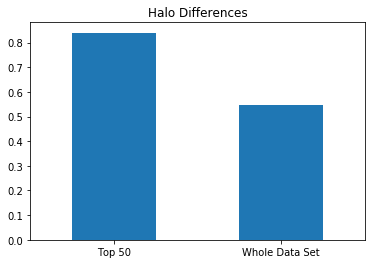

In [505]:
count = (df3['halo'] == 'True').sum() / 50
countwhole = (df['halo'] == 'True').sum() / 480
plotdf = pd.DataFrame(data = [count,countwhole], index=['Top 50','Whole Data Set'])

ax = plotdf.plot.bar(rot=0,legend=False,title="Halo Differences")



In [ ]:
# On the left bar of the plot, you can see the proportion of halos in the top 50. On the right, there are the
# proportion of halos in the whole dataset.
# Based on this plot, we can see that the amount of halos is proportionately larger in the top 50 than in the 
# entire dataset, which leads us to believe that the halos might indicate a bigger rank classification.